### imports

In [24]:

from Energy import OUTPUT_DIR, set_debug, debug, switch_debug, get_debug
from Energy.my_energy_reports import create_energy_reports
from Energy.subProjection.my_projection import create_monthly_projection
from Energy.subGraphs.my_plots import barplot, lineplot, swarmplot, set_of_speedo

### setings

In [2]:
set_debug(False)

False

### create energy obiect

In [3]:
energy_object, _ = create_energy_reports(
    refresh = False,
    export_back = 0.8,
    kWh_cost = 0.65,
)

### easy use

,week,production_,import_
0,2021/33,70.482,23.027
1,2021/34,124.163,70.066
2,2021/35,152.891,103.935
3,2021/36,242.659,79.455
4,2021/37,120.609,74.637
5,2021/38,112.290,90.983
6,2021/39,146.523,116.124
7,2021/40,146.779,107.667
8,2021/41,125.359,107.290
9,2021/42,111.895,101.177


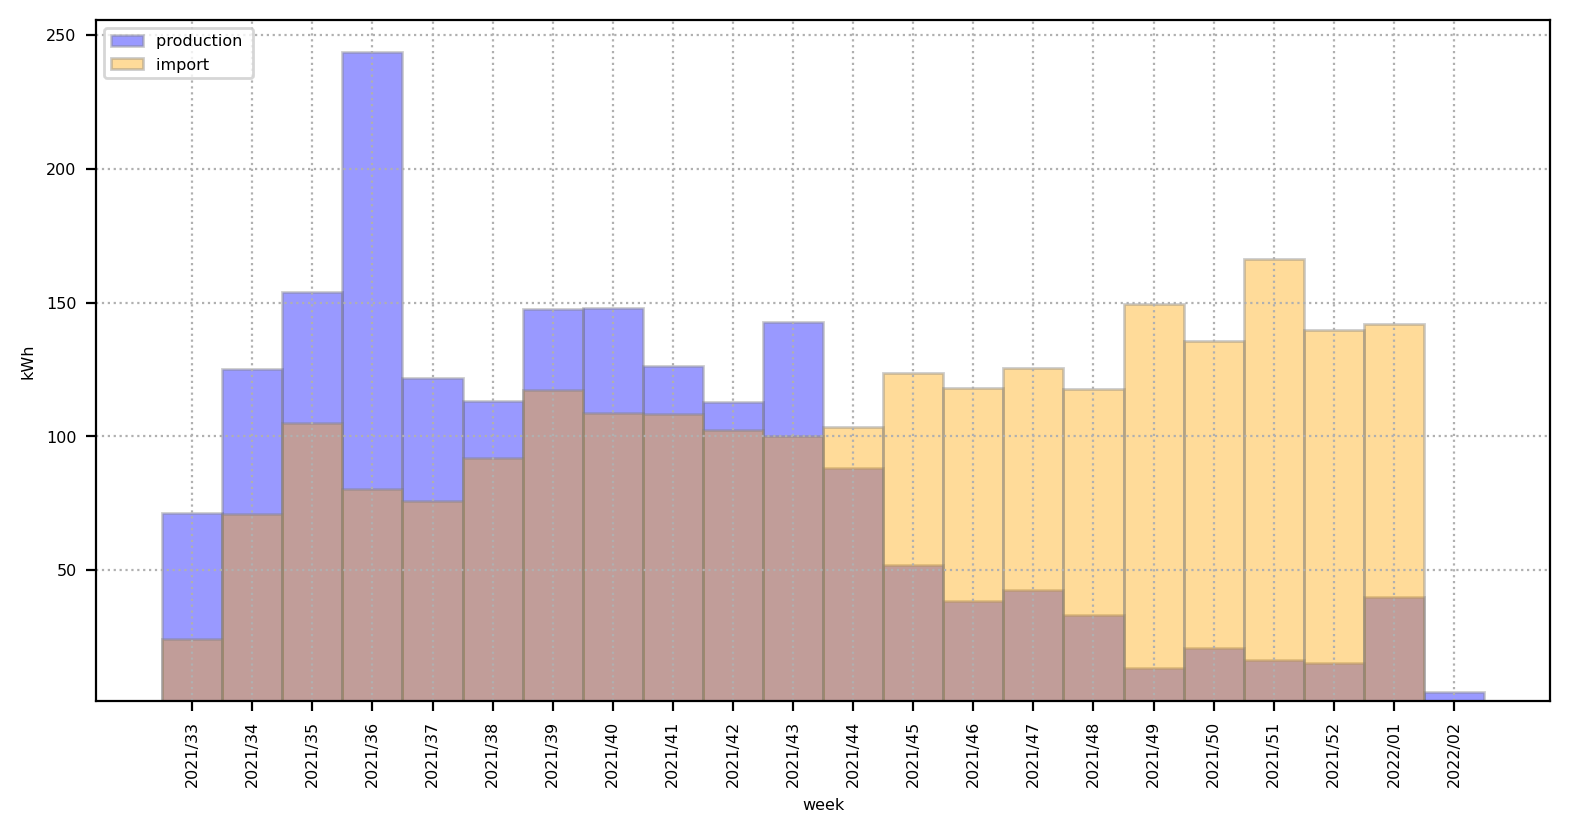

In [4]:
energy_object.basic_barplot(
    group_by="week", columns=['production_', 'import_'],
    agg='sum'
)

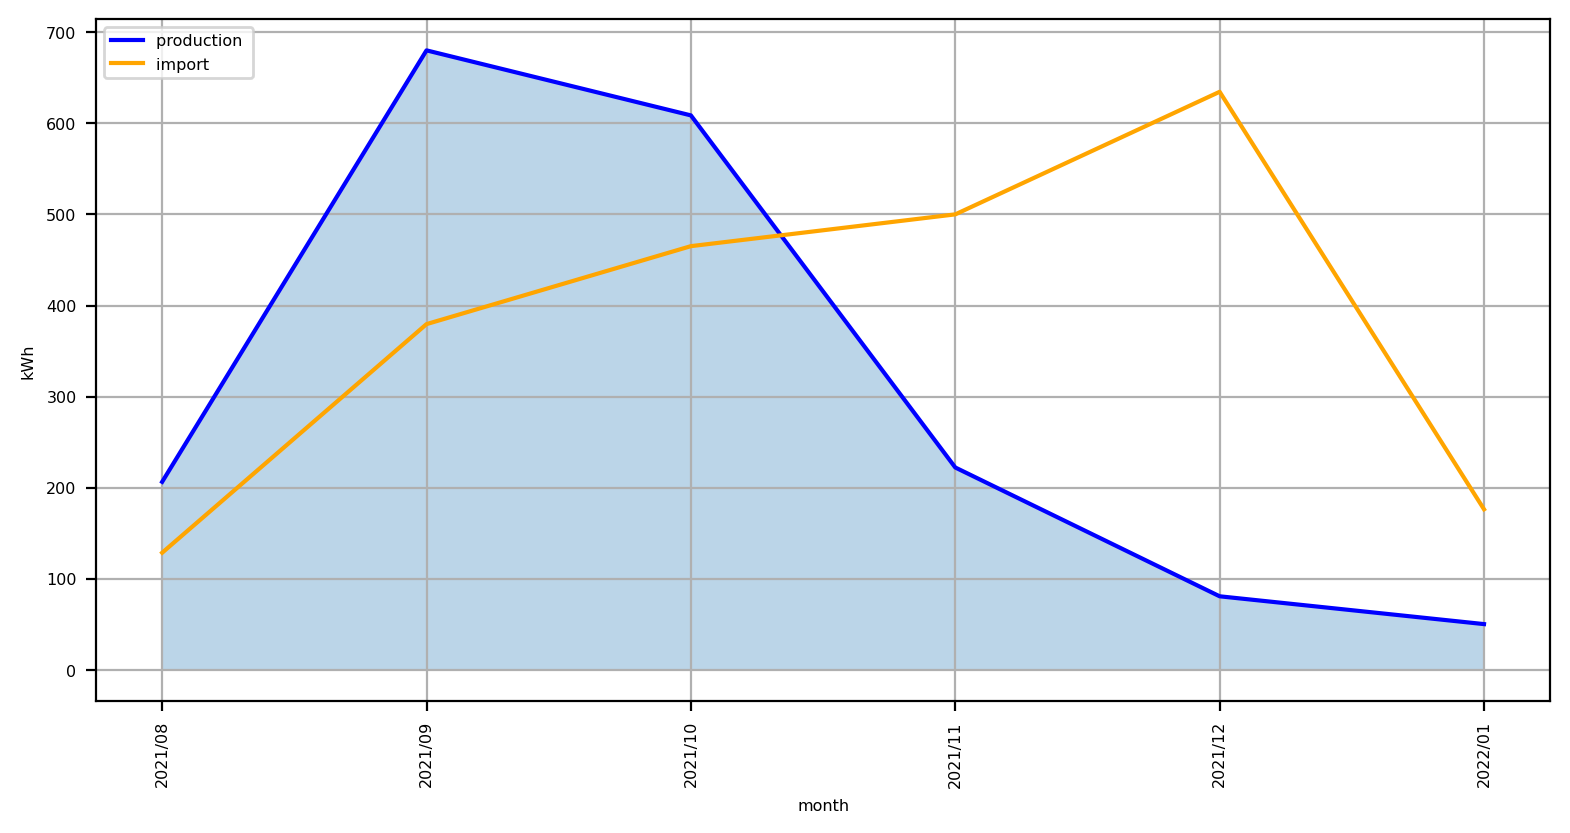

In [5]:
energy_object.basic_lineplot(
    group_by="month", columns=['production_', 'import_'],
    agg='sum', fill=["production_"]
)

No handles with labels found to put in legend.


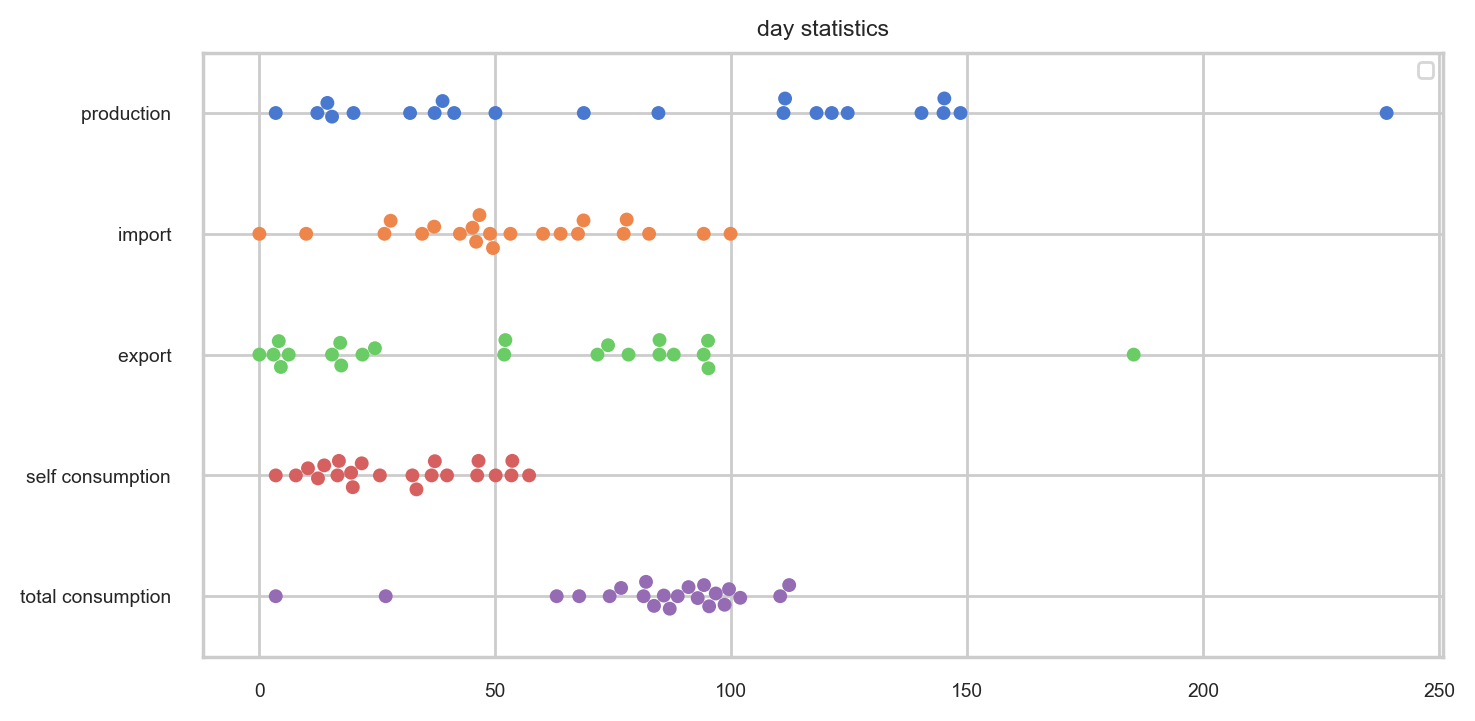

In [13]:
day_hours = [8,9,10,11,12,13,14,15,16,17,18,19]
swarmplot(
    energy_object.get_energy[energy_object.get_energy['hour'].isin(day_hours)],
    filename='',
    agg='sum',
    group_by="week",
    series_to_plot=['production_', 'import_', 'export_', 'self_consumption_', 'total_consumption_'],
    dotsize=5, 
    title="day statistics"
)

C:\Users\PiotrKalista\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PiotrKalista\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PiotrKalista\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


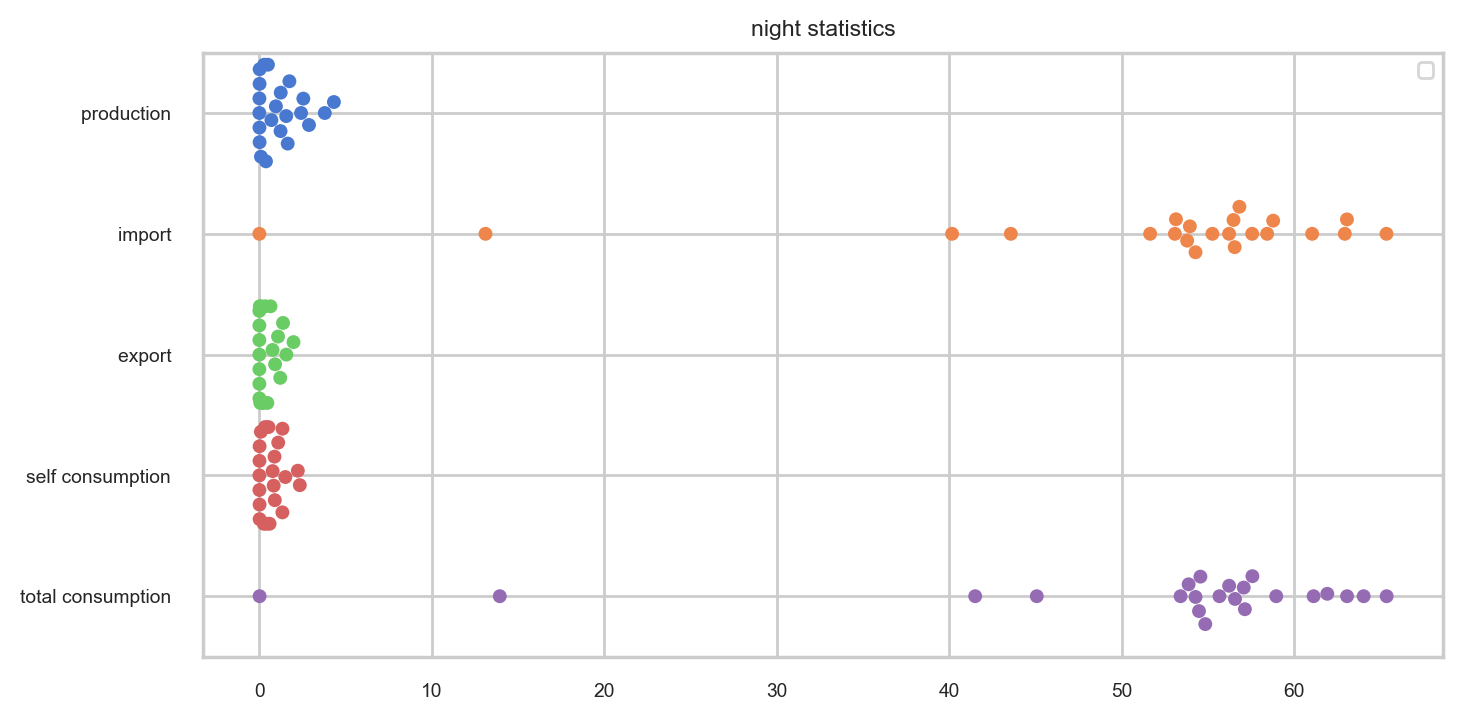

In [14]:
swarmplot(
    energy_object.get_energy[~energy_object.get_energy['hour'].isin(day_hours)],
    filename='',
    agg='sum',
    group_by="week",
    series_to_plot=['production_', 'import_', 'export_', 'self_consumption_', 'total_consumption_'],
    dotsize=5, 
    title="night statistics"
)